

# Install Library


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=2a3f6fd6e356a4f89d3ce7899d77f4b4cdb4456c9308bf385f1404c52e7e2d2a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Understanding Data

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
from nltk.tokenize import wordpunct_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #untuk stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #untuk stopword
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')

from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Import Data

In [ ]:
pd.set_option('display.max_colwidth', None)
data = pd.read_excel("https://github.com/ivanmasyudi/Big-Data/blob/main/Dataset%20Tokped.xlsx?raw=true")
data

ulasan  \
0                                                                                                                                                                                                                                                                                                                        puas dgn layanan Tokopedia   
1     Bagus sih karena banyak promo nya..Ada promo diskon dan gratis ongkir juga. Tapi yg bikin kecewa untuk promo diskon pembelian pulsa dan tagihan, selalu gk bisa pakai. Padahal ada yg diskon 15rb dan setelah dipakai, ujung-ujungnya saldo dikembalikan lagi karena transaksi gagal. Padahal udh seneng bgt bisa beli pulsa dan token murah.   
2                                                                                                                                                                                                                                                                                                   Smga aja aplikasi ny bagus n memuaskan...aamiin   
3                                                                                                                                                                                                                                                                                                                      Good. Great. Nice. Wonderful   
4                                                                                                                                                                                                                                                        Emang mantul buat belanjaa selaluu memiliki promo" yang menarik belum kalo lagi live .ðŸ’•   
...                                                                                                                                                                                                                                                                                                                                             ...   
3950                                                                                                                                                                                              Resiko gak punya kurir sendiri ya lama pengirimannya ,satu kota sama seler pengiriman 3 hari ðŸ˜‘ mending aplikasi sebelah yg punya kurir sendiri   
3951                                                                                                                                                                                                                                                                            Mending Hapus aja sicepat dari Tokopedia, bikin emosi orang belanja   
3952                                                                                                                                                                                                                                                                          Pengunan baru gak bisa belanja. Tolong data sya jngn di salah gunakan   
3953                                                                                                                                                 Layanan CS (Pio) lambat banget, slow respond, tidak bisa ngasih solusi walau sudah dikasih bukti screenshoot, pemahaman terhadap masalah juga sangat kurang. Ngabisin waktu doang lapor ke CS.   
3954                                                                                                                                                                                                                                                                                                                                  banyak update   

        label  
0     positif  
1     positif  
2     positif  
3     positif  
4     positif  
...       ...  
3950  negatif  
3951  negatif  
3952  negatif  
3953  negatif  
3954  negatif  

[3955 rows x 2 columns]

In [ ]:
teks  = pd.DataFrame(data[['ulasan','label']])
teks

ulasan  \
0                                                                                                                                                                                                                                                                                                                        puas dgn layanan Tokopedia   
1     Bagus sih karena banyak promo nya..Ada promo diskon dan gratis ongkir juga. Tapi yg bikin kecewa untuk promo diskon pembelian pulsa dan tagihan, selalu gk bisa pakai. Padahal ada yg diskon 15rb dan setelah dipakai, ujung-ujungnya saldo dikembalikan lagi karena transaksi gagal. Padahal udh seneng bgt bisa beli pulsa dan token murah.   
2                                                                                                                                                                                                                                                                                                   Smga aja aplikasi ny bagus n memuaskan...aamiin   
3                                                                                                                                                                                                                                                                                                                      Good. Great. Nice. Wonderful   
4                                                                                                                                                                                                                                                        Emang mantul buat belanjaa selaluu memiliki promo" yang menarik belum kalo lagi live .ðŸ’•   
...                                                                                                                                                                                                                                                                                                                                             ...   
3950                                                                                                                                                                                              Resiko gak punya kurir sendiri ya lama pengirimannya ,satu kota sama seler pengiriman 3 hari ðŸ˜‘ mending aplikasi sebelah yg punya kurir sendiri   
3951                                                                                                                                                                                                                                                                            Mending Hapus aja sicepat dari Tokopedia, bikin emosi orang belanja   
3952                                                                                                                                                                                                                                                                          Pengunan baru gak bisa belanja. Tolong data sya jngn di salah gunakan   
3953                                                                                                                                                 Layanan CS (Pio) lambat banget, slow respond, tidak bisa ngasih solusi walau sudah dikasih bukti screenshoot, pemahaman terhadap masalah juga sangat kurang. Ngabisin waktu doang lapor ke CS.   
3954                                                                                                                                                                                                                                                                                                                                  banyak update   

        label  
0     positif  
1     positif  
2     positif  
3     positif  
4     positif  
...       ...  
3950  negatif  
3951  negatif  
3952  negatif  
3953  negatif  
3954  negatif  

[3955 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


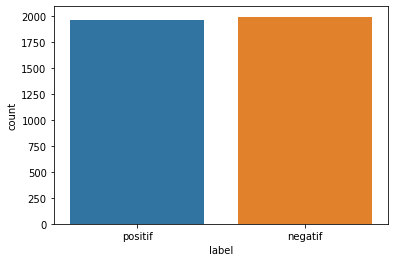

In [ ]:
visual = sns.countplot(teks['label'])
#visual.set_xticklabels(['Negatif','Positif'])
plt.show()

# Preprocessing

## Case Folding

In [ ]:
teks['cf'] = teks['ulasan'].str.lower()
teks[['cf']]

cf
0                                                                                                                                                                                                                                                                                                                        puas dgn layanan tokopedia
1     bagus sih karena banyak promo nya..ada promo diskon dan gratis ongkir juga. tapi yg bikin kecewa untuk promo diskon pembelian pulsa dan tagihan, selalu gk bisa pakai. padahal ada yg diskon 15rb dan setelah dipakai, ujung-ujungnya saldo dikembalikan lagi karena transaksi gagal. padahal udh seneng bgt bisa beli pulsa dan token murah.
2                                                                                                                                                                                                                                                                                                   smga aja aplikasi ny bagus n memuaskan...aamiin
3                                                                                                                                                                                                                                                                                                                      good. great. nice. wonderful
4                                                                                                                                                                                                                                                        emang mantul buat belanjaa selaluu memiliki promo" yang menarik belum kalo lagi live .ðÿ’•
...                                                                                                                                                                                                                                                                                                                                             ...
3950                                                                                                                                                                                              resiko gak punya kurir sendiri ya lama pengirimannya ,satu kota sama seler pengiriman 3 hari ðÿ˜‘ mending aplikasi sebelah yg punya kurir sendiri
3951                                                                                                                                                                                                                                                                            mending hapus aja sicepat dari tokopedia, bikin emosi orang belanja
3952                                                                                                                                                                                                                                                                          pengunan baru gak bisa belanja. tolong data sya jngn di salah gunakan
3953                                                                                                                                                 layanan cs (pio) lambat banget, slow respond, tidak bisa ngasih solusi walau sudah dikasih bukti screenshoot, pemahaman terhadap masalah juga sangat kurang. ngabisin waktu doang lapor ke cs.
3954                                                                                                                                                                                                                                                                                                                                  banyak update

[3955 rows x 1 columns]

In [ ]:
for casee in teks['cf']:
    print(casee)

puas dgn layanan tokopedia
bagus sih karena banyak promo nya..ada promo diskon dan gratis ongkir juga. tapi yg bikin kecewa untuk promo diskon pembelian pulsa dan tagihan, selalu gk bisa pakai. padahal ada yg diskon 15rb dan setelah dipakai, ujung-ujungnya saldo dikembalikan lagi karena transaksi gagal. padahal udh seneng bgt bisa beli pulsa dan token murah.
smga aja aplikasi ny bagus n memuaskan...aamiin
good. great. nice. wonderful
emang mantul buat belanjaa selaluu memiliki promo" yang menarik belum kalo lagi live .ðÿ’•
sejauh ini tidak masalah
ayo belanja disini
barangnya bagus dan asli
terima kasih tokopedia aku bisa belanja ðÿ¥°
di sini barang2nya lengkap
belanja puas,gratis ongkir
aplikasi e commerce yg paling sering aku gunakan, karena banyak gratis ongkir tanpa harus bayar pake e wallet
toko pedia mantab benerðÿ˜˜
mantap promo gratis
saat saya memasukan barang yang ingin saya beli ke keranjang dan setelah saya ingin membayarnya tidak ada barang yang muncul di keranjang smuanya

## Cleaning

In [ ]:
def remove_punct(text):
    #Remove Karakter ASCII, angka, punctuation
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub('x(\d+[a-zA-Z]+|[a-zA-Z]+\d+|\d+)',"",text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'[\W\s_]',' ',text)

    #Remove Kata tak penting
    text = re.sub(r'\b[a-zA-z]\b', "", text)
    text = re.sub(r'\b(nya)\b|\b(ny)\b', "", text)
    text = re.sub(r'\b[wkwk]+\b|\b[hehe]+\b|\b(sih)\b|\b(nyh)\b|\b(yh)\b|\b(dn)\b|\b(zz)\b|\b[hihi]+\b|\b[huhh]+\b|\b[dehh]+\b|\b[sih]+\b', "", text)
    text = re.sub(r'\b[an]+\b|\b[ter]+\b|\b[tar]+\b|\b[sat]+\b|\b[set]+\b',"", text)
    text = text.replace("anjrekdjeowpqjejdirkeowpsksjdkekw"," ")
    #Remove spasi diawal dan akhir, url, hastag, tagar, kata akhiran berlebihan, baris baru, tab
    text = re.sub("^\s+|\s+$", "", text)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text) #url
    text = re.sub("@[A-Za-z0-9]+","", text)
    text = re.sub("#[A-Za-z0-9]+","", text)
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    text = pola.sub(r'\1', text)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ") 
    return text

teks['clean'] = teks['cf'].apply(lambda x: remove_punct(x))
teks[['clean']]

clean
0                                                                                                                                                                                                                                                                                                             puas dgn layanan tokopedia
1     bagus  karena banyak promo ada promo diskon dan gratis ongkir juga  tapi yg bikin kecewa untuk promo diskon pembelian pulsa dan tagihan  selalu gk bisa pakai  padahal ada yg diskon rb dan setelah dipakai  ujung ujungnya saldo dikembalikan lagi karena transaksi gagal  padahal udh seneng bgt bisa beli pulsa dan token murah
2                                                                                                                                                                                                                                                                                             smga aja aplikasi  bagus  memuaskan aamiin
3                                                                                                                                                                                                                                                                                                           good  great  nice  wonderful
4                                                                                                                                                                                                                                                   emang mantul buat belanjaa selaluu memiliki promo  yang menarik belum kalo lagi live
...                                                                                                                                                                                                                                                                                                                                  ...
3950                                                                                                                                                                                         resiko gak punya kurir sendiri ya lama pengirimannya  satu kota sama seler pengiriman  hari mending aplikasi sebelah yg punya kurir sendiri
3951                                                                                                                                                                                                                                                                 mending hapus aja sicepat dari tokopedia  bikin emosi orang belanja
3952                                                                                                                                                                                                                                                               pengunan baru gak bisa belanja  tolong data sya jngn di salah gunakan
3953                                                                                                                                       layanan cs  pio  lambat banget  slow respond  tidak bisa ngasih solusi walau sudah dikasih bukti screenshoot  pemahaman terhadap masalah juga sangat kurang  ngabisin waktu doang lapor ke cs
3954                                                                                                                                                                                                                                                                                                                       banyak update

[3955 rows x 1 columns]

In [ ]:
for clean in teks['clean']:
    print(clean)

puas dgn layanan tokopedia
bagus  karena banyak promo ada promo diskon dan gratis ongkir juga  tapi yg bikin kecewa untuk promo diskon pembelian pulsa dan tagihan  selalu gk bisa pakai  padahal ada yg diskon rb dan setelah dipakai  ujung ujungnya saldo dikembalikan lagi karena transaksi gagal  padahal udh seneng bgt bisa beli pulsa dan token murah
smga aja aplikasi  bagus  memuaskan aamiin
good  great  nice  wonderful
emang mantul buat belanjaa selaluu memiliki promo  yang menarik belum kalo lagi live
sejauh ini tidak masalah
ayo belanja disini
barangnya bagus dan asli
terima kasih tokopedia aku bisa belanja
di sini barangnya lengkap
belanja puas gratis ongkir
aplikasi  commerce yg paling sering aku gunakan  karena banyak gratis ongkir tanpa harus bayar pake  wallet
toko pedia mantab bener
mantap promo gratis
saya memasukan barang yang ingin saya beli ke keranjang dan setelah saya ingin membayarnya tidak ada barang yang muncul di keranjang smuanya tidak ada  gimana saya mau beli barang

## Normalizing

In [ ]:
#Normalisasi slang

normalized_word = pd.read_excel("https://github.com/ivanmasyudi/Big-Data/blob/main/kamus%20perbaikan%20kata.xlsx?raw=true")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
  if row[0] not in normalized_word_dict:
    normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return ' '.join([normalized_word_dict[term] if term in normalized_word_dict else term for term in document.split()])

teks['normal_term'] = teks['clean'].apply(lambda x: normalized_term(x))
teks[['normal_term']]

normal_term
0                                                                                                                                                                                                                                                                                                                          puas dengan layanan tokopedia
1     bagus karena banyak promo ada promo diskon dan gratis ongkos kirim juga tapi yang membuat kecewa untuk promo diskon pembelian pulsa dan tagihan selalu tidak bisa pakai padahal ada yang diskon ribu dan setelah dipakai ujung ujungnya saldo dikembalikan lagi karena transaksi gagal padahal sudah senang banget bisa beli pulsa dan token murah
2                                                                                                                                                                                                                                                                                                            semoga saja aplikasi bagus memuaskan semoga
3                                                                                                                                                                                                                                                                                                                            bagus great bagus wonderful
4                                                                                                                                                                                                                                                                     memang bagus buat belanja selalu memiliki promo yang menarik belum kalau lagi live
...                                                                                                                                                                                                                                                                                                                                                  ...
3950                                                                                                                                                                                                      resiko tidak punya kurir sendiri iya lama pengirimannya satu kota sama seler pengiriman hari baiknya aplikasi sebelah yang punya kurir sendiri
3951                                                                                                                                                                                                                                                                               baiknya hapus saja sicepat dari tokopedia membuat emosi orang belanja
3952                                                                                                                                                                                                                                                                             pengunan baru tidak bisa belanja tolong data saya jngn di salah gunakan
3953                                                                                                                                                         layanan cs pio lambat banget slow respond tidak bisa memberi solusi walau sudah dikasih bukti screenshoot pemahaman terhadap masalah juga sangat kurang menghabiskan waktu saja lapor ke cs
3954                                                                                                                                                                                                                                                                                                                                       banyak update

[3955 rows x 1 columns]

In [ ]:
for normall in teks['normal_term']:
    print(normall)

puas dengan layanan tokopedia
bagus karena banyak promo ada promo diskon dan gratis ongkos kirim juga tapi yang membuat kecewa untuk promo diskon pembelian pulsa dan tagihan selalu tidak bisa pakai padahal ada yang diskon ribu dan setelah dipakai ujung ujungnya saldo dikembalikan lagi karena transaksi gagal padahal sudah senang banget bisa beli pulsa dan token murah
semoga saja aplikasi bagus memuaskan semoga
bagus great bagus wonderful
memang bagus buat belanja selalu memiliki promo yang menarik belum kalau lagi live
sejauh ini tidak masalah
ayo belanja disini
barangnya bagus dan asli
terima kasih tokopedia aku bisa belanja
di sini barangnya lengkap
belanja puas gratis ongkos kirim
aplikasi commerce yang paling sering aku gunakan karena banyak gratis ongkos kirim tanpa harus bayar pakai wallet
toko pedia bagus benar
mantap promo gratis
saya memasukan barang yang ingin saya beli ke keranjang dan setelah saya ingin membayarnya tidak ada barang yang muncul di keranjang semuanya tidak ada

## Tokenizing

In [ ]:
def tokenization(text):
  
    text = nltk.tokenize.word_tokenize(text)
    return text

teks['token'] = teks['normal_term'].apply(lambda x: tokenization(x))
teks[['token']]

token
0                                                                                                                                                                                                                                                                                                                                                                           [puas, dengan, layanan, tokopedia]
1     [bagus, karena, banyak, promo, ada, promo, diskon, dan, gratis, ongkos, kirim, juga, tapi, yang, membuat, kecewa, untuk, promo, diskon, pembelian, pulsa, dan, tagihan, selalu, tidak, bisa, pakai, padahal, ada, yang, diskon, ribu, dan, setelah, dipakai, ujung, ujungnya, saldo, dikembalikan, lagi, karena, transaksi, gagal, padahal, sudah, senang, banget, bisa, beli, pulsa, dan, token, murah]
2                                                                                                                                                                                                                                                                                                                                                           [semoga, saja, aplikasi, bagus, memuaskan, semoga]
3                                                                                                                                                                                                                                                                                                                                                                             [bagus, great, bagus, wonderful]
4                                                                                                                                                                                                                                                                                                             [memang, bagus, buat, belanja, selalu, memiliki, promo, yang, menarik, belum, kalau, lagi, live]
...                                                                                                                                                                                                                                                                                                                                                                                                        ...
3950                                                                                                                                                                                                                                      [resiko, tidak, punya, kurir, sendiri, iya, lama, pengirimannya, satu, kota, sama, seler, pengiriman, hari, baiknya, aplikasi, sebelah, yang, punya, kurir, sendiri]
3951                                                                                                                                                                                                                                                                                                                          [baiknya, hapus, saja, sicepat, dari, tokopedia, membuat, emosi, orang, belanja]
3952                                                                                                                                                                                                                                                                                                                      [pengunan, baru, tidak, bisa, belanja, tolong, data, saya, jngn, di, salah, gunakan]
3953                                                                                                                                                                                  [layanan, cs, pio, lambat, banget, slow, respond, tidak, bisa, memberi, solusi, walau, sudah, dikasih, bukti, screenshoot, pemahaman, terhadap, masalah, juga, sangat, kurang, menghabiskan, waktu, saja, lapor, ke, cs]
3954

In [ ]:
for tokens in teks['token']:
    print(tokens)

['puas', 'dengan', 'layanan', 'tokopedia']
['bagus', 'karena', 'banyak', 'promo', 'ada', 'promo', 'diskon', 'dan', 'gratis', 'ongkos', 'kirim', 'juga', 'tapi', 'yang', 'membuat', 'kecewa', 'untuk', 'promo', 'diskon', 'pembelian', 'pulsa', 'dan', 'tagihan', 'selalu', 'tidak', 'bisa', 'pakai', 'padahal', 'ada', 'yang', 'diskon', 'ribu', 'dan', 'setelah', 'dipakai', 'ujung', 'ujungnya', 'saldo', 'dikembalikan', 'lagi', 'karena', 'transaksi', 'gagal', 'padahal', 'sudah', 'senang', 'banget', 'bisa', 'beli', 'pulsa', 'dan', 'token', 'murah']
['semoga', 'saja', 'aplikasi', 'bagus', 'memuaskan', 'semoga']
['bagus', 'great', 'bagus', 'wonderful']
['memang', 'bagus', 'buat', 'belanja', 'selalu', 'memiliki', 'promo', 'yang', 'menarik', 'belum', 'kalau', 'lagi', 'live']
['sejauh', 'ini', 'tidak', 'masalah']
['ayo', 'belanja', 'disini']
['barangnya', 'bagus', 'dan', 'asli']
['terima', 'kasih', 'tokopedia', 'aku', 'bisa', 'belanja']
['di', 'sini', 'barangnya', 'lengkap']
['belanja', 'puas', 'gratis'

## Filtering

In [ ]:
url = 'https://github.com/ivanmasyudi/Big-Data/blob/main/Stoplist.xlsx?raw=true'
stoplist = pd.read_excel(url)

list_stopwords = set(stoplist['STOPLIST'])

hapus = ["tidak","baik"]
for i in hapus:
    if i in list_stopwords:
        list_stopwords.remove(i)

In [ ]:
#list_stopwords

In [ ]:
#StopList
#url = 'https://github.com/ivanmasyudi/Big-Data/blob/main/Stoplist.xlsx?raw=true'
#stoplist = pd.read_excel(url)

#list_stopwords = set(stoplist['STOPLIST'])

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

teks['stopw'] = teks['token'].apply(lambda x: stopwords_removal(x))
teks[['stopw']]

stopw
0                                                                                                                                                                                                                         [puas, layanan, tokopedia]
1     [bagus, promo, promo, diskon, gratis, ongkos, kirim, kecewa, promo, diskon, pembelian, pulsa, tagihan, tidak, pakai, diskon, ribu, dipakai, ujung, ujungnya, saldo, dikembalikan, transaksi, gagal, senang, banget, beli, pulsa, token, murah]
2                                                                                                                                                                                                       [semoga, aplikasi, bagus, memuaskan, semoga]
3                                                                                                                                                                                                                   [bagus, great, bagus, wonderful]
4                                                                                                                                                                                                   [bagus, belanja, memiliki, promo, menarik, live]
...                                                                                                                                                                                                                                              ...
3950                                                                                                                                          [resiko, tidak, kurir, iya, pengirimannya, kota, seler, pengiriman, baiknya, aplikasi, sebelah, kurir]
3951                                                                                                                                                                                     [baiknya, hapus, sicepat, tokopedia, emosi, orang, belanja]
3952                                                                                                                                                                                           [pengunan, tidak, belanja, tolong, data, jngn, salah]
3953                                                                                                               [layanan, cs, pio, lambat, banget, slow, respond, tidak, solusi, dikasih, bukti, screenshoot, pemahaman, menghabiskan, lapor, cs]
3954                                                                                                                                                                                                                                        [update]

[3955 rows x 1 columns]

In [ ]:
for stopp in teks['stopw']:
    print(stopp)

['puas', 'layanan', 'tokopedia']
['bagus', 'promo', 'promo', 'diskon', 'gratis', 'ongkos', 'kirim', 'kecewa', 'promo', 'diskon', 'pembelian', 'pulsa', 'tagihan', 'tidak', 'pakai', 'diskon', 'ribu', 'dipakai', 'ujung', 'ujungnya', 'saldo', 'dikembalikan', 'transaksi', 'gagal', 'senang', 'banget', 'beli', 'pulsa', 'token', 'murah']
['semoga', 'aplikasi', 'bagus', 'memuaskan', 'semoga']
['bagus', 'great', 'bagus', 'wonderful']
['bagus', 'belanja', 'memiliki', 'promo', 'menarik', 'live']
['tidak']
['ayo', 'belanja']
['barangnya', 'bagus', 'asli']
['terima', 'kasih', 'tokopedia', 'belanja']
['barangnya', 'lengkap']
['belanja', 'puas', 'gratis', 'ongkos', 'kirim']
['aplikasi', 'commerce', 'gratis', 'ongkos', 'kirim', 'bayar', 'pakai', 'wallet']
['toko', 'pedia', 'bagus']
['mantap', 'promo', 'gratis']
['memasukan', 'barang', 'beli', 'keranjang', 'membayarnya', 'tidak', 'barang', 'muncul', 'keranjang', 'tidak', 'beli', 'barang', 'tolong', 'diperbaiki']
['komplen', 'kurir', 'tolol', 'sumpah']
[

In [ ]:
columns = teks.columns
column_index = columns.get_loc("stopw")
print(column_index)

6


In [ ]:
for row in teks['stopw'].index:
    print(row, end = " ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
for row in teks.index:
    a =  teks['stopw'][row]
    if len(a) == 0:
        teks.drop(row, axis=0, inplace=True)
print(len(teks))

3947


## Stemming

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

teks['stem'] = teks['stopw'].apply(lambda x: stemming(x))
teks[['stem']]

stem
0                                                                                                                                                                                                          [puas, layan, tokopedia]
1     [bagus, promo, promo, diskon, gratis, ongkos, kirim, kecewa, promo, diskon, beli, pulsa, tagih, tidak, pakai, diskon, ribu, pakai, ujung, ujung, saldo, kembali, transaksi, gagal, senang, banget, beli, pulsa, token, murah]
2                                                                                                                                                                                               [moga, aplikasi, bagus, muas, moga]
3                                                                                                                                                                                                  [bagus, great, bagus, wonderful]
4                                                                                                                                                                                       [bagus, belanja, milik, promo, tarik, live]
...                                                                                                                                                                                                                             ...
3950                                                                                                                                           [resiko, tidak, kurir, iya, kirim, kota, seler, kirim, baik, aplikasi, belah, kurir]
3951                                                                                                                                                                       [baik, hapus, sicepat, tokopedia, emosi, orang, belanja]
3952                                                                                                                                                                          [pengunan, tidak, belanja, tolong, data, jngn, salah]
3953                                                                                                             [layan, cs, pio, lambat, banget, slow, respond, tidak, solusi, kasih, bukti, screenshoot, paham, habis, lapor, cs]
3954                                                                                                                                                                                                                       [update]

[3947 rows x 1 columns]

In [ ]:
for stemm in teks['stem']:
    print(stemm)

['puas', 'layan', 'tokopedia']
['bagus', 'promo', 'promo', 'diskon', 'gratis', 'ongkos', 'kirim', 'kecewa', 'promo', 'diskon', 'beli', 'pulsa', 'tagih', 'tidak', 'pakai', 'diskon', 'ribu', 'pakai', 'ujung', 'ujung', 'saldo', 'kembali', 'transaksi', 'gagal', 'senang', 'banget', 'beli', 'pulsa', 'token', 'murah']
['moga', 'aplikasi', 'bagus', 'muas', 'moga']
['bagus', 'great', 'bagus', 'wonderful']
['bagus', 'belanja', 'milik', 'promo', 'tarik', 'live']
['tidak']
['ayo', 'belanja']
['barang', 'bagus', 'asli']
['terima', 'kasih', 'tokopedia', 'belanja']
['barang', 'lengkap']
['belanja', 'puas', 'gratis', 'ongkos', 'kirim']
['aplikasi', 'commerce', 'gratis', 'ongkos', 'kirim', 'bayar', 'pakai', 'wallet']
['toko', 'dia', 'bagus']
['mantap', 'promo', 'gratis']
['pasu', 'barang', 'beli', 'keranjang', 'bayar', 'tidak', 'barang', 'muncul', 'keranjang', 'tidak', 'beli', 'barang', 'tolong', 'baik']
['komplen', 'kurir', 'tolol', 'sumpah']
['mantap', 'banget', 'aplikasi', 'belanja', 'belanja']
['se

In [ ]:
a = teks['stem'] #ini variabel a buat nanti disimpen di pickle biar kita ga ngerun stemming terus setiap mau memroses data karena lamaaaa:((
a

AttributeError: ignored

In [ ]:
import pickle
list_stem = []

for tokenstm in a:
    list_stem.append(tokenstm)
    print(tokenstm)
    
with open('list_stem.pkl','wb') as s:
    pickle.dump(list_stem,s)

['puas', 'layan', 'tokopedia']
['bagus', 'promo', 'promo', 'diskon', 'gratis', 'ongkos', 'kirim', 'kecewa', 'promo', 'diskon', 'beli', 'pulsa', 'tagih', 'tidak', 'pakai', 'diskon', 'ribu', 'pakai', 'ujung', 'ujung', 'saldo', 'kembali', 'transaksi', 'gagal', 'senang', 'banget', 'beli', 'pulsa', 'token', 'murah']
['moga', 'aplikasi', 'bagus', 'muas', 'moga']
['bagus', 'great', 'bagus', 'wonderful']
['bagus', 'belanja', 'milik', 'promo', 'tarik', 'live']
['tidak']
['ayo', 'belanja']
['barang', 'bagus', 'asli']
['terima', 'kasih', 'tokopedia', 'belanja']
['barang', 'lengkap']
['belanja', 'puas', 'gratis', 'ongkos', 'kirim']
['aplikasi', 'commerce', 'gratis', 'ongkos', 'kirim', 'bayar', 'pakai', 'wallet']
['toko', 'dia', 'bagus']
['mantap', 'promo', 'gratis']
['pasu', 'barang', 'beli', 'keranjang', 'bayar', 'tidak', 'barang', 'muncul', 'keranjang', 'tidak', 'beli', 'barang', 'tolong', 'baik']
['komplen', 'kurir', 'tolol', 'sumpah']
['mantap', 'banget', 'aplikasi', 'belanja', 'belanja']
['se

# Load Model

## Load Model Stemming

In [ ]:
stem_model = pickle.load(open('/content/drive/MyDrive/Big Data/model/list_stem.pkl', 'rb'))

# Visualisasi WordCloud

## Seluruh data

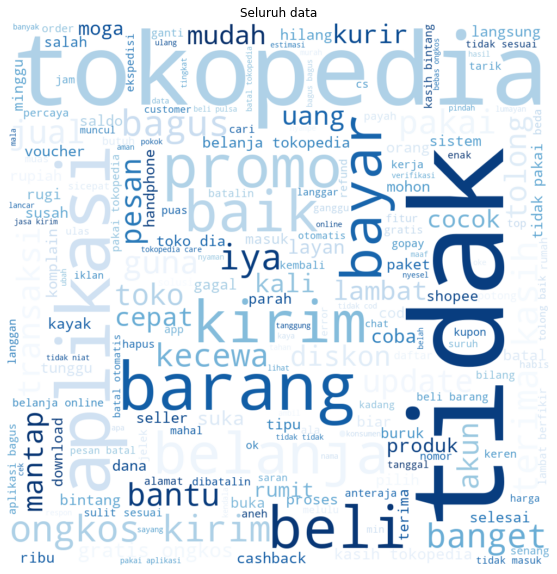

In [ ]:
wordd = [' '.join(i) for i in stem_model]
all_text_s1 = ' '.join([j for j in wordd])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Seluruh data")
plt.margins(x=0, y=0)
plt.show()

## Ulasan Negatif

In [ ]:
teks_negatif = teks[teks['label']=='negatif']
teks_negatif[['stem']]

stem
1964                                                                                                 [tidak, cod, jelek]
1965           [orang, nga, rumit, beli, produk, bayar, alfamart, cas, dana, masuk, transaksi, batal, tokopedia, kecewa]
1966                                                           [astaghfirullah, aplikasi, rumit, banget, maaf, uninstal]
1967                                 [bayar, promo, kupon, tidak, singkron, kupon, tidak, pakai, gajelas, kalah, shopee]
1968                                                                                               [nihh, jelek, banget]
...                                                                                                                  ...
3950                                [resiko, tidak, kurir, iya, kirim, kota, seler, kirim, baik, aplikasi, belah, kurir]
3951                                                            [baik, hapus, sicepat, tokopedia, emosi, orang, belanja]
3952                                                               [pengunan, tidak, belanja, tolong, data, jngn, salah]
3953  [layan, cs, pio, lambat, banget, slow, respond, tidak, solusi, kasih, bukti, screenshoot, paham, habis, lapor, cs]
3954                                                                                                            [update]

[1987 rows x 1 columns]

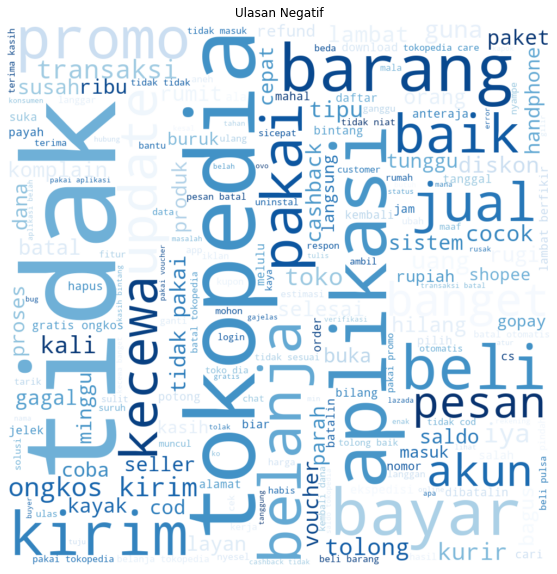

In [ ]:
wordd_neg = [' '.join(i) for i in teks_negatif['stem']]
all_text_s2 = ' '.join([j for j in wordd_neg])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

## Ulasan Positif

In [ ]:
teks_positif = teks[teks['label']=='positif']
teks_positif[['stem']]

stem
0                                                                                                                                                                                                          [puas, layan, tokopedia]
1     [bagus, promo, promo, diskon, gratis, ongkos, kirim, kecewa, promo, diskon, beli, pulsa, tagih, tidak, pakai, diskon, ribu, pakai, ujung, ujung, saldo, kembali, transaksi, gagal, senang, banget, beli, pulsa, token, murah]
2                                                                                                                                                                                               [moga, aplikasi, bagus, muas, moga]
3                                                                                                                                                                                                  [bagus, great, bagus, wonderful]
4                                                                                                                                                                                       [bagus, belanja, milik, promo, tarik, live]
...                                                                                                                                                                                                                             ...
1959                                                                                                                                                                                                                        [bagus]
1960                                                                                                       [suka, aplikasi, sayang, suka, sperti, kurir, tidak, tercamtum, poto, nomer, telpon, sulit, hubung, pesan, tidak, gerak]
1961                                                                                                                                                                                          [promo, free, ongkos, kirim, sungguh]
1962                                                                                                                                                                                               [masuk, notorious, market, list]
1963                                                                                                                                                         [pindah, alamat, kirim, alamat, puas, blnja, tokopedia, terima, kasih]

[1960 rows x 1 columns]

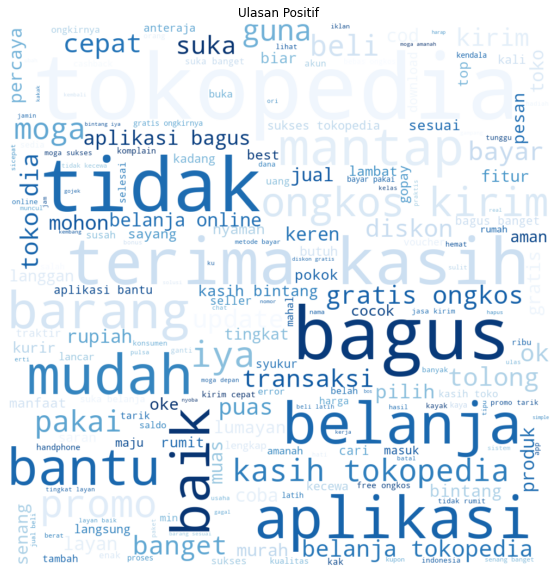

In [ ]:
wordd_pos = [' '.join(i) for i in teks_positif['stem']]
all_text_s3 = ' '.join([j for j in wordd_pos])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s3)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

# Ekstraksi Fitur

## TF-IDF

In [ ]:
c = [x for x in stem_model]
#print (c)
corpus = [' '.join(i) for i in c]
corpus

['puas layan tokopedia',
 'bagus promo promo diskon gratis ongkos kirim kecewa promo diskon beli pulsa tagih tidak pakai diskon ribu pakai ujung ujung saldo kembali transaksi gagal senang banget beli pulsa token murah',
 'moga aplikasi bagus muas moga',
 'bagus great bagus wonderful',
 'bagus belanja milik promo tarik live',
 'tidak',
 'ayo belanja',
 'barang bagus asli',
 'terima kasih tokopedia belanja',
 'barang lengkap',
 'belanja puas gratis ongkos kirim',
 'aplikasi commerce gratis ongkos kirim bayar pakai wallet',
 'toko dia bagus',
 'mantap promo gratis',
 'pasu barang beli keranjang bayar tidak barang muncul keranjang tidak beli barang tolong baik',
 'komplen kurir tolol sumpah',
 'mantap banget aplikasi belanja belanja',
 'semua kurang lebih bantu',
 'belanja senang investasi reksadana',
 'bagus mantap indonesia banget',
 'saran tolong putus kerja anteraja kurir lambat tidak tanggung alami kecewa anteraja terima kasih',
 'enak belanja online kadang ketemu seller',
 'kasih bin

In [ ]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(corpus) 
print(x_tfidf)

  (0, 3778)	0.3211597719480116
  (0, 2026)	0.6195245799789655
  (0, 3029)	0.7162720821616514
  (1, 2433)	0.1670134371524636
  (1, 3767)	0.23149228460741292
  (1, 317)	0.11066142045466794
  (1, 3355)	0.16530709059453944
  (1, 1207)	0.14985708392534722
  (1, 3823)	0.12616822173376585
  (1, 1757)	0.14918557511189048
  (1, 3226)	0.14694180747602398
  (1, 3902)	0.41487871047407665
  (1, 3175)	0.16643434340819968
  (1, 2743)	0.20622696603481172
  (1, 3734)	0.06530993394841587
  (1, 3606)	0.21195557830612632
  (1, 3037)	0.3295164240040239
  (1, 398)	0.21696804900336514
  (1, 1726)	0.12311659766323843
  (1, 1820)	0.0999585513796893
  (1, 2693)	0.12225582457294128
  (1, 1337)	0.1276440101398459
  (1, 955)	0.4122057201503302
  (1, 3011)	0.33497123371237264
  (1, 270)	0.10494008996311704
  :	:
  (3943, 396)	0.24535667598208352
  (3943, 3778)	0.18057101059977868
  (3944, 2840)	0.5685279486992073
  (3944, 1626)	0.5226404391475442
  (3944, 819)	0.39149480893515626
  (3944, 3223)	0.3456072993834932
 

In [ ]:
dftfidf = pd.DataFrame(x_tfidf.todense(),
                 index=[f'D{i+1}' for i in range (len(corpus))],
                 columns=tfidf.get_feature_names_out()) 
dftfidf

aamanah  abai  abal  abistu   ac  academy  acak  acara  acces  accord  \
D1         0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D2         0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D3         0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D4         0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D5         0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
...        ...   ...   ...     ...  ...      ...   ...    ...    ...     ...   
D3943      0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D3944      0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D3945      0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D3946      0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   
D3947      0.0   0.0   0.0     0.0  0.0      0.0   0.0    0.0    0.0     0.0   

       ...  yok  you  your  youtube  ytb  yth  yukk  yyg  zaman  zolim  
D1     ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D2     ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D3     ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D4     ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D5     ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
...    ...  ...  ...   ...      ...  ...  ...   ...  ...    ...    ...  
D3943  ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D3944  ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D3945  ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D3946  ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  
D3947  ...  0.0  0.0   0.0      0.0  0.0  0.0   0.0  0.0    0.0    0.0  

[3947 rows x 4091 columns]

In [ ]:
pickle.dump(tfidf, open('Vect_TFIDF.pkl', 'wb'))

In [ ]:
pickle.dump(x_tfidf, open('Vect_XTFIDF.pkl', 'wb'))

In [ ]:
tfidf.vocabulary_

{'puas': 3029,
 'layan': 2026,
 'tokopedia': 3778,
 'bagus': 270,
 'promo': 3011,
 'diskon': 955,
 'gratis': 1337,
 'ongkos': 2693,
 'kirim': 1820,
 'kecewa': 1726,
 'beli': 398,
 'pulsa': 3037,
 'tagih': 3606,
 'tidak': 3734,
 'pakai': 2743,
 'ribu': 3175,
 'ujung': 3902,
 'saldo': 3226,
 'kembali': 1757,
 'transaksi': 3823,
 'gagal': 1207,
 'senang': 3355,
 'banget': 317,
 'token': 3767,
 'murah': 2433,
 'moga': 2389,
 'aplikasi': 195,
 'muas': 2411,
 'great': 1340,
 'wonderful': 4049,
 'belanja': 396,
 'milik': 2330,
 'tarik': 3648,
 'live': 2089,
 'ayo': 254,
 'barang': 342,
 'asli': 224,
 'terima': 3694,
 'kasih': 1699,
 'lengkap': 2051,
 'commerce': 732,
 'bayar': 373,
 'wallet': 4012,
 'toko': 3771,
 'dia': 867,
 'mantap': 2199,
 'pasu': 2778,
 'keranjang': 1780,
 'muncul': 2427,
 'tolong': 3800,
 'baik': 281,
 'komplen': 1863,
 'kurir': 1950,
 'tolol': 3799,
 'sumpah': 3573,
 'semua': 3351,
 'kurang': 1948,
 'lebih': 2039,
 'bantu': 335,
 'investasi': 1534,
 'reksadana': 3122,


# Seleksi Fitur

In [ ]:
label_model = pickle.load(open('/content/drive/MyDrive/Big Data/model/label.pkl', 'rb'))

# Training

In [ ]:
X = x_tfidf

In [ ]:
y = label_model

In [ ]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(label_model)

In [ ]:
pickle.dump(y, open('label.pkl', 'wb'))

##Training Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pickle.dump(model, open('RFMODEL.pkl', 'wb'))

In [ ]:
pred_rf = model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       580
           1       0.84      0.84      0.84       605

    accuracy                           0.84      1185
   macro avg       0.84      0.84      0.84      1185
weighted avg       0.84      0.84      0.84      1185



In [ ]:
print("Nilai Akurasi Random Forest: ", "%.2f"% accuracy_score(y_test,pred_rf))

Nilai Akurasi Random Forest:  0.84


In [ ]:
print("Nilai Precision Random Forest: ", "%.2f"% precision_score(y_test,pred_rf))

Nilai Precision Random Forest:  0.84


In [ ]:
print("Nilai Recall Random Forest: ", "%.2f"% recall_score(y_test,pred_rf))

Nilai Recall Random Forest:  0.84


## Training Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
pickle.dump(clf, open('ABMODEL.pkl', 'wb'))

In [ ]:
pred_ab = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_ab))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       580
           1       0.82      0.83      0.83       605

    accuracy                           0.82      1185
   macro avg       0.82      0.82      0.82      1185
weighted avg       0.82      0.82      0.82      1185



In [ ]:
print("Nilai Akurasi Random Forest: ", "%.2f"% accuracy_score(y_test,pred_ab))

Nilai Akurasi Random Forest:  0.82


In [ ]:
print("Nilai Precision Random Forest: ", "%.2f"% precision_score(y_test,pred_ab))

Nilai Precision Random Forest:  0.82


In [ ]:
print("Nilai Recall Random Forest: ", "%.2f"% recall_score(y_test,pred_ab))

Nilai Recall Random Forest:  0.83


In [ ]:
cv_10 = KFold(n_splits=10, random_state=10, shuffle=True)
scores_acc10 = cross_val_score(model_nb, X, y, scoring='accuracy', cv=cv_10)

NameError: ignored

# Prediksi

## Load Model

In [ ]:
pickle_model = pickle.load(open('/content/drive/MyDrive/Big Data/model/RFMODEL.pkl', 'rb'))

In [ ]:
vector_model = pickle.load(open('/content/drive/MyDrive/Big Data/model/Vect_TFIDF.pkl', 'rb'))

In [ ]:
ab_model = pickle.load(open('/content/ABMODEL.pkl', 'rb'))

## Predict With Random Forest

In [ ]:
normalized_word = pd.read_excel("https://github.com/ivanmasyudi/Big-Data/blob/main/kamus%20perbaikan%20kata.xlsx?raw=true")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
  if row[0] not in normalized_word_dict:
    normalized_word_dict[row[0]] = row[1] 

def prediksi(text):
    text = ' '.join([normalized_word_dict[term] if term in normalized_word_dict else term for term in text.split()])
    tfidf_vect = vector_model.transform([text])
    predik =  pickle_model.predict(tfidf_vect)
    if predik == 1:
        hpred = 'positif'
    if predik == 0:
        hpred = 'negatif'
    return hpred
prediksi('Selalu puas pake aplikasi tokopedia. Sampai saat ini gak ada masalah.. Tapi kalau bisa ada fitur pilih ekspedisi dong, kyk marketplace sebelah. Soalnya kalau dapet ekspedisi antaraja, pengiriman sering telat sampai 1 minggu. Transit di 1 kota bisa sampe 2-3 hari')

'negatif'

## Predict With Adaboost

In [ ]:
def prediksi2(text):
    text = ' '.join([normalized_word_dict[term] if term in normalized_word_dict else term for term in text.split()])
    tfidf_vect = vector_model.transform([text])
    predik =  ab_model.predict(tfidf_vect)
    if predik == 1:
        hpred = 'positif'
    if predik == 0:
        hpred = 'negatif'
    return hpred
prediksi2('Selalu puas pake aplikasi tokopedia. Sampai saat ini gak ada masalah.. Tapi kalau bisa ada fitur pilih ekspedisi dong, kyk marketplace sebelah. Soalnya kalau dapet ekspedisi antaraja, pengiriman sering telat sampai 1 minggu. Transit di 1 kota bisa sampe 2-3 hari')

'negatif'